<a href="https://colab.research.google.com/github/rxgvnd/Machine-Learning/blob/master/W13_IraSuryani_31410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluating Techniques
### Classification Model

In [2]:
#Ira Suryani Anggraini - 00000031410
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
digits = datasets.load_digits()

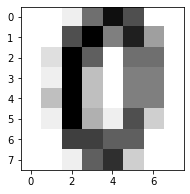

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r)

In [5]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [6]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [7]:
digits.target[10]

0

In [8]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)
X_train = X_digits[:int(.7*num_data_points)]
y_train = y_digits[:int(.7*num_data_points)]
X_test = X_digits[:int(.7*num_data_points)]
y_test = y_digits[:int(.7*num_data_points)]
print(X_train.shape, X_test.shape)

(1257, 64) (1257, 64)


In [9]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('Logistic Regression mean Accuracy : %f' %logistic.score(X_test,y_test))

Logistic Regression mean Accuracy : 1.000000


In [11]:
#Using Wisconsin Breast Cancer dataset
import numpy as np
from sklearn.datasets import load_breast_cancer

#load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)


(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
#Unsupervised learning-partitioning
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

[1 1 1 0 1 0 1 0 0 0]


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

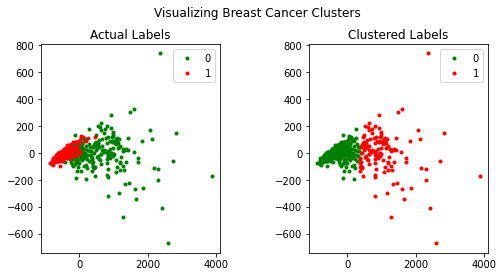

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing Breast Cancer Clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

In [15]:
#Unsupervised Learning - Hierarchical

from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress = True)

Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


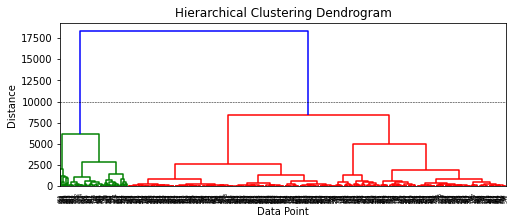

In [16]:
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

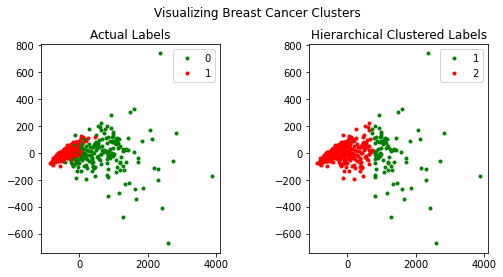

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing Breast Cancer Clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

### Model Evaluation
### Evaluating Classification Models

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


###Confusion Matrix

In [20]:
from sklearn import linear_model

logistic=linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Confusion Matrix
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred,
                            classes=[0,1])

          Predicted:     
                   0    1
Actual: 0         59    4
        1          1  107


In [23]:
possitive_class = 1
TP = 106
FP = 4
TN = 9
FN = 2

###Evaluating Classification Models

In [24]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.95041


In [25]:
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision: ', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision:  0.96396
Manually Computed Precision: 0.96364


In [26]:
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.98148


In [27]:
fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred),5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec),5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97248


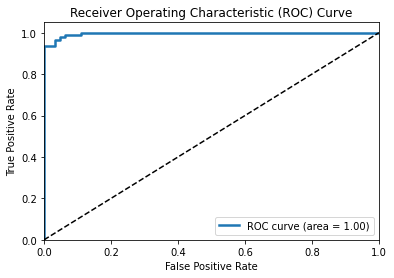

In [28]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

###Evaluating Clustering Models

In [29]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

###External Validation

In [30]:
km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)

Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.299 0.399]


###Internal Validation

In [31]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5120588504057626


In [32]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [33]:
feature, target = make_regression(n_samples=100,
                                 n_features=3,
                                 n_informative=3,
                                 n_targets=1,
                                 noise=1,
                                 coef=False,
                                 random_state=1)

In [34]:
ols = LinearRegression()

In [35]:
cross_val_score(ols,feature,target,scoring='neg_mean_squared_error')

array([-0.78986135, -0.80181655, -1.57407742, -0.42401745, -0.63949642])

In [36]:
cross_val_score(ols,feature,target,scoring='r2')

array([0.99994298, 0.99991772, 0.99985451, 0.9999636 , 0.99991436])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

def_svc = SVC(random_state=42)
def_svc.fit(X_train,y_train)

def_y_pred = def_svc.predict(X_test)
print('Default Model States:')
meu.display_model_performance_metrics(true_labels=y_test,predicted_labels=def_y_pred,classes=[0,1])

Default Model States:
Model Performance metrics:
------------------------------
Accuracy: 0.9357
Precision: 0.9416
Recall: 0.9357
F1 Score: 0.9342

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         52   11
        1          0  108


In [38]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {'kernel': ['linear','rbf'],
                  'gamma': [1e-3,1e-4],
                  'C': [1, 10, 50, 100]}
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42),grid_parameters,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print("Grid scores for all ther models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean,std,params in zip (means,stds,clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std *2, params))
    
print("\nBest parameters set found on development set:",clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all ther models based on CV:

0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.91193 (+/-0.04607) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.92459 (+/-0.02287) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.92959 (+/-0.03449) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93462 (+/-0.02969) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95468 (+/-0.05703) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.9018

In [39]:
gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats:')
meu.display_model_performance_metrics(true_labels=y_test,predicted_labels=tuned_y_pred,classes=[0,1])



Tuned Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         61    2
        1          3  105


In [40]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': scipy.stats.expon(scale=10),
             'gamma': scipy.stats.expon(scale=1),
             'kernel': ['rbf','linear']}

random_search = RandomizedSearchCV (SVC(random_state=42), param_distributions=param_grid,
                                  n_iter=50, cv=5)
random_search.fit(X_train,y_train)
print("Best parameters set found on development set: ")
random_search.best_params_

Best parameters set found on development set: 


{'C': 12.160251072108817, 'gamma': 0.48019121096379064, 'kernel': 'linear'}

In [41]:
rs_best = random_search.best_estimator_
rs_y_pred = rs_best.predict(X_test)
meu.get_metrics(true_labels=y_test,predicted_labels=rs_y_pred)

Accuracy: 0.9649
Precision: 0.9649
Recall: 0.9649
F1 Score: 0.9649


In [52]:
conda install -c conda-forget skater

SyntaxError: ignored

In [53]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=data.feature_names)
model = InMemoryModel(logistic.predict_proba, examples=X_train,
                      target_names=logistic.classes_)

ModuleNotFoundError: ignored

In [54]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer (X_train, feature_names=data.feature_names,
                           discretize_continuous=True, class_names=['0','1'])

ModuleNotFoundError: ignored

In [ ]:
exp.explain_instance(X_test[1],logistic.predict_proba).show_in_notebook()

NameError: ignored

In [56]:
#Model Deployment

from sklearn.externals import joblib
joblib.dump(logistic,'lr_model.pkl')

['lr_model.pkl']

In [57]:
lr=joblib.load('lr_model.pkl')
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print(lr.predict(X_test[10:11]),y_test[10:11])

[1] [1]
